Graphs are a very powerful tool for modern day programming. In this notebook, I will go through some the `NetworkX` library. This library provides a vast amount of functionalities for visualizing data

In [197]:
import csv
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating Graphs in NetworkX
* creating a graph object
* adding nodes and edges
* adding attributes

Graph with 6 nodes and 0 edges


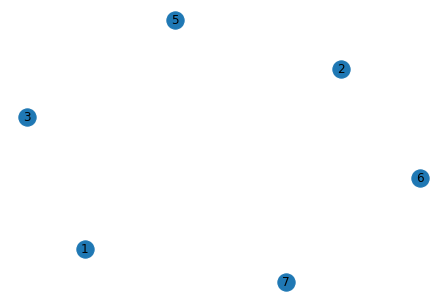

In [198]:
# Creating a graph object
G = nx.Graph()

# Adding nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

## Adding multiple nodes at once
G.add_nodes_from([5,6,7])

# Checking the nodes in the graph
G.nodes()
# Checking the graph info
print(nx.info(G))
# Drawing the graph
nx.draw(G, with_labels=True)
plt.grid()

Graph with 6 nodes and 7 edges


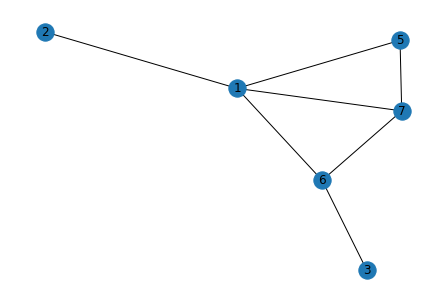

In [199]:
# Adding edges
G.add_edge(1,2)
G.add_edges_from([(7,5), (5,1), (1,7), (3,6), (6,7), (6,1)])
print(nx.info(G))
nx.draw(G, with_labels=True)

## Adding and inspecting atributes

In [200]:
G.add_node(10, name= "Blaise")
G.add_edge(2,3, relationship= "Siblings")
print(nx.get_node_attributes(G, "name"))
print(nx.get_edge_attributes(G, "relationship"))

{10: 'Blaise'}
{(2, 3): 'Siblings'}


### Adding attributes for each existing node

In [201]:
names = {
    1: "one",
    2: "two",
    3: "three",
    4: "Four",
    5: "five",
    6: "six"
}
nx.set_node_attributes(G, names, "names")

In [202]:
nx.get_node_attributes(G, "names")

{1: 'one', 2: 'two', 3: 'three', 5: 'five', 6: 'six'}

In [203]:
data = pd.read_csv("https://raw.githubusercontent.com/rtidatascience/connected-nx-tutorial/master/data/ga_edgelist.csv")
edges = data.values.tolist()
edges

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres'],
 ['sloan', 'altman'],
 ['torres', 'arizona'],
 ['torres', 'karev'],
 ['derek', 'grey'],
 ['karev', 'izzie'],
 ["o'malley", 'izzie'],
 ['torres', "o'malley"],
 ['yang', 'colin'],
 ['yang', 'preston'],
 ['karev', 'kepner'],
 ['sloan', 'addison'],
 ['karev', 'addison'],
 ['derek', 'addison'],
 ['sloan', 'nancy'],
 ['karev', 'olivia'],
 ["o'malley", 'olivia'],
 ['grey', "o'malley"],
 ['karev', 'mrs. seabury'],
 ['chief', 'adele'],
 ['chief', 'ellis grey'],
 ['ellis grey', 'thatch grey'],
 ['susan grey', 'thatch grey'],
 ['bailey', 'tucker'],
 ['izzie', 'hank'],
 ['izzie', 'denny'],
 ['grey', 'finn'],
 ['grey', 'steve'],
 ['bailey', 'ben'],
 ['lexi', 'avery']]

In [204]:
GA = nx.from_edgelist(edges)
nx.info(GA)

'Graph with 32 nodes and 34 edges'

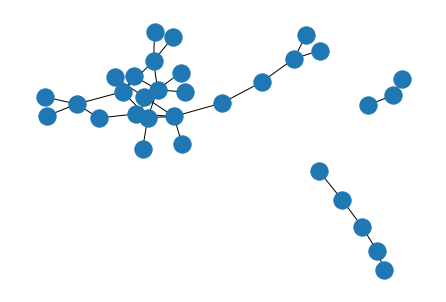

In [205]:
nx.draw(GA)

In [206]:
data.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [207]:
GA = nx.from_pandas_edgelist(data, source="from", target="to")
nx.info(GA)

'Graph with 32 nodes and 34 edges'

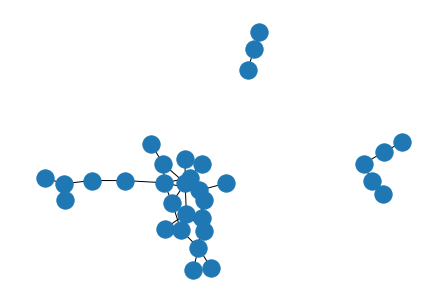

In [208]:
nx.draw(GA)

## Adjacency Matrix

In [209]:
adj_mat = nx.adjacency_matrix(GA).todense()
adj_mat

matrix([[0, 1, 1, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]])

# Plottin with Networkx

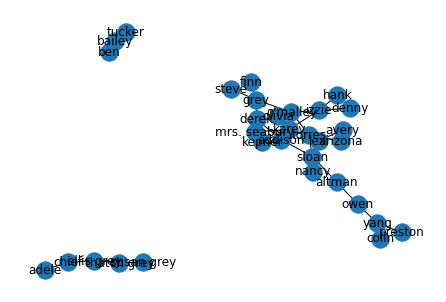

In [210]:
# Easiest way to draw
nx.draw(GA, with_labels= True)

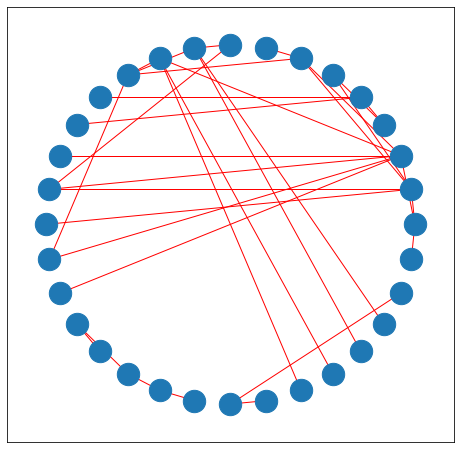

In [213]:
# More advanced plotting
plt.figure(figsize=(8,8))
#nx.draw(GA, with_labels= True)

# Generating layout
layout = nx.circular_layout(GA)
nx.draw_networkx_nodes(GA, pos= layout, node_size=500)
nx.draw_networkx_edges(GA, pos= layout, edge_color="red");